In [1]:
import pandas as pd
# reading pre-formatted dataset
X_train = pd.read_csv("../training_datasets/base_train.csv") 
X_train = X_train.drop(columns=['Unnamed: 0'])

df_diagnosis = pd.read_csv("../training_datasets/base_train_answer.csv") 
df_diagnosis = df_diagnosis.drop(columns=['Unnamed: 0'])
y_train = df_diagnosis['diagnosis'].ravel()

# joining info and diagnosis into one df
df_full = pd.concat([df_diagnosis, X_train], axis=1)
df_full.head()

print(df_full.head())

print(X_train.shape)
print(y_train.shape)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      good        10.26         14.71           66.20      321.6   
1      good        12.43         17.00           78.60      477.3   
2       bad        17.20         24.52          114.20      929.4   
3      good        14.26         18.17           91.22      633.1   
4      good         7.76         24.54           47.92      181.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09882           0.09159         0.03581              0.02037   
1          0.07557           0.03454         0.01342              0.01699   
2          0.10710           0.18300         0.16920              0.07944   
3          0.06576           0.05220         0.02475              0.01374   
4          0.05263           0.04362         0.00000              0.00000   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1633  ...        10.880          19.48 

Best estimator: 100
   estimators     score
0       100.0  0.938462
1       200.0  0.938462
2       300.0  0.938462
3       400.0  0.938462
4       500.0  0.938462


<AxesSubplot:xlabel='estimators', ylabel='score'>

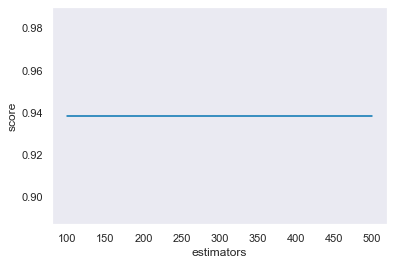

In [2]:
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
min_estimators = 100
max_estimators = 500 # alter this number if needed
step = 100
result = []
best_score = 0
best_estimator = 0

for i in range(min_estimators, max_estimators+step, step):
    clf = RandomForestClassifier(
        n_estimators=i, 
        max_depth=None, 
        random_state=0, 
        n_jobs=-1)
    
    s = make_scorer(recall_score, pos_label='bad')
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=s)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

# plotting results
sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

# best and smallest number of estimators using above loop was 200

In [3]:
clf = RandomForestClassifier(
        n_estimators=200, 
        max_depth=None, 
        random_state=0, 
        n_jobs=-1)
s = make_scorer(recall_score, pos_label='bad')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
print("recall_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

# recall_score = 0.9736 (-0.002 over gradientBoost)
# randomForest with hyper [n_estimators]

recall_score: 0.93846 (+/- 0.05756)


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[184  12]
 [  5 311]]
              precision    recall  f1-score   support

         bad       0.97      0.94      0.96       196
        good       0.96      0.98      0.97       316

    accuracy                           0.97       512
   macro avg       0.97      0.96      0.96       512
weighted avg       0.97      0.97      0.97       512

